## GRIP @ The Sparks Foundation - Data Science and Business Analytics

### Author- Vandana Prajapati

## TASK-1- Prediction using Supervised Machine Learning

### Simple Linear Regression
#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

#### Importing the Libraries -Pandas, Numpy, Matplotlib

In [4]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#### Reading from the data source

In [20]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Successfully imported Data")

s_data.head(11)

Successfully imported Data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [33]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [34]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Input data Visualization

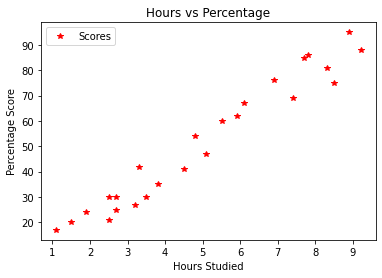

In [41]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='*',color='red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Preparing the data
##### The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [10]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the Algorithm
##### We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### Plotting the Line of regression
##### Now since our model is trained now, its the time to visualize the best-fit line of regression.

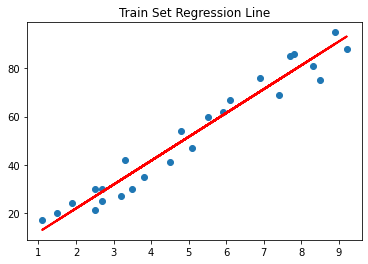

In [43]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.title("Train Set Regression Line")
plt.scatter(X, y)
plt.plot(X, line,color='red',linewidth = 2);
plt.show()

### Making Predictions
##### Now that we have trained our algorithm, it's time to test the model by making some predictions.

In [14]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing Actual vs Predicted Model

In [44]:
y_pred = regressor.predict(X_test)
predictions = pd.DataFrame({"Hours":X_test.flatten(), "Actual_Score":y_test, "Predicted_Score":y_pred} )
predictions

,Hours,Actual_Score,Predicted_Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [22]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


### Difference in Actual and Predicted value using Bar plot

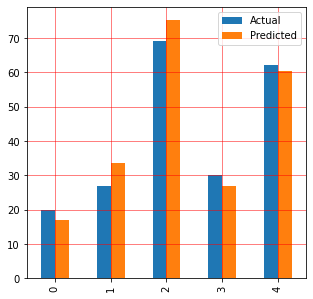

In [25]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [30]:
# You can also test with your own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


#### Evaluating the model
#### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error.

In [31]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


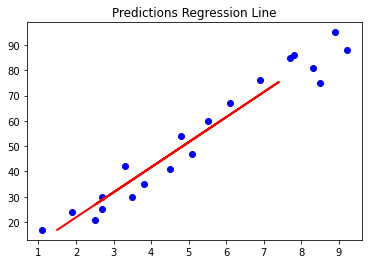

In [48]:
plt.title("Predictions Regression Line")
plt.scatter(X_train, y_train, color = "blue")
plt.plot(X_test, y_pred, color = "red", linewidth = 2)
plt.show()

### Final Conclusion

In [47]:
value = np.array(9.25)
pred = regressor.predict(value.reshape(-1, 1))
print(f"If you spend {value} hrs/day, then you will get your score  = {pred[0]}")

If you spend 9.25 hrs/day, then you will get your score  = 93.69173248737538


### Thank You